## Preprocessing

In [1]:
# Import our dependencies
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from google.colab import files
#  Import and read the charity_data.csv.
import pandas as pd 
uploaded = files.upload()

Saving charity_data.csv to charity_data.csv


In [2]:
import io
 
application_df = pd.read_csv(io.StringIO(uploaded['charity_data.csv'].decode('utf-8')))
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
filtered_df = application_df.drop(columns=["NAME", "EIN"])
filtered_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
filtered_cat = filtered_df.dtypes[filtered_df.dtypes == "object"].index.tolist()
filtered_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [5]:
filtered_df[filtered_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
app_type = filtered_df['APPLICATION_TYPE'].value_counts().reset_index()
app_type

,index,APPLICATION_TYPE
0,T3,27037
1,T4,1542
2,T6,1216
3,T5,1173
4,T19,1065
5,T8,737
6,T7,725
7,T10,528
8,T9,156
9,T13,66


In [7]:
# Choose a cutoff value and create a list of application types to be replaced
application_types_to_replace = []
application_types_to_replace = app_type[app_type['APPLICATION_TYPE'] <= 156]['index']

# Replace in dataframe
for app in application_types_to_replace:
    filtered_df['APPLICATION_TYPE'] = filtered_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
filtered_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
class_count = filtered_df['CLASSIFICATION'].value_counts().reset_index()
class_count

,index,CLASSIFICATION
0,C1000,17326
1,C2000,6074
2,C1200,4837
3,C3000,1918
4,C2100,1883
...,...,...
66,C4120,1
67,C8210,1
68,C2561,1
69,C4500,1


In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_count_filtered = []
class_count_filtered = class_count[class_count['CLASSIFICATION'] > 1]
class_count_filtered

,index,CLASSIFICATION
0,C1000,17326
1,C2000,6074
2,C1200,4837
3,C3000,1918
4,C2100,1883
5,C7000,777
6,C1700,287
7,C4000,194
8,C5000,116
9,C1270,114


In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
classifications_to_replace = []
classifications_to_replace = class_count[class_count['CLASSIFICATION'] < 1883]['index']

# Replace in dataframe
for cls in classifications_to_replace:
    filtered_df['CLASSIFICATION'] = filtered_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
filtered_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
filtered_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
numerical_df = pd.get_dummies(filtered_df)
numerical_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
# Split our preprocessed data into our features and target arrays
y = numerical_df["IS_SUCCESSFUL"].values
X = numerical_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

<ipython-input-13-775795f8e043>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = numerical_df.drop(["IS_SUCCESSFUL"],1).values


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  120
hidden_nodes_layer2 = 90

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="LeakyReLU")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="LeakyReLU"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               5280      
                                                                 
 dense_1 (Dense)             (None, 90)                10890     
                                                                 
 dense_2 (Dense)             (None, 1)                 91        
                                                                 
Total params: 16,261
Trainable params: 16,261
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5747 - accuracy: 0.7171
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5607 - accuracy: 0.7266
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5567 - accuracy: 0.7277
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5548 - accuracy: 0.7297
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5545 - accuracy: 0.7275
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5533 - accuracy: 0.7296
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5518 - accuracy: 0.7293
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5508 - accuracy: 0.7313
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5505 - accuracy: 0.7313
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5505 - accura

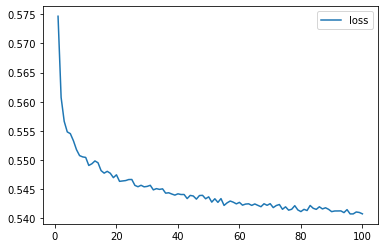

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

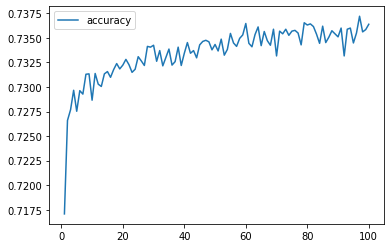

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5582 - accuracy: 0.7226 - 504ms/epoch - 2ms/step
Loss: 0.5581892728805542, Accuracy: 0.7225655913352966


In [21]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity.h5')
files.download('AlphabetSoupCharity.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>